In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

df = pd.read_csv('./data/polls_us_election_2016.csv')

In [3]:
df['population'].value_counts()

population
lv    3727
rv     418
v       42
a       21
Name: count, dtype: int64

In [4]:
import pandas as pd

# Assuming 'df' is your original dataframe with 'startdate', 'enddate', 'samplesize', 'rawpoll_clinton', etc.
df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

# Function to expand each row into multiple rows based on the date range between startdate and enddate
def expand_row(row):
    date_range = pd.date_range(row['startdate'], row['enddate'])
    return pd.DataFrame({
        'date': date_range,
        'Population': row['population'],  # Copy the Population column
        'samplesize': row['samplesize'] / len(date_range),  # Distribute samplesize over the date range
        'rawpoll_clinton': row['rawpoll_clinton'],
        'rawpoll_trump': row['rawpoll_trump'],
        'adjpoll_clinton': row['adjpoll_clinton'],
        'adjpoll_trump': row['adjpoll_trump']
    })

# Apply the expand_row function to each row and concatenate the results
df_expanded = pd.concat(df.apply(expand_row, axis=1).values).reset_index(drop=True)

# Now group by 'date' and 'Population' and compute the mean for each column, summing up the samplesize
df_daily = df_expanded.groupby(['date', 'Population']).agg({
    'samplesize': 'sum',
    'rawpoll_clinton': 'mean',
    'rawpoll_trump': 'mean',
}).reset_index()

# The result is the daily aggregated polls with the Population column included
print(df_daily)

          date Population    samplesize  rawpoll_clinton  rawpoll_trump
0   2015-11-06         rv     48.181818        45.000000      38.000000
1   2015-11-07         rv     48.181818        45.000000      38.000000
2   2015-11-07          v    645.000000        42.000000      47.000000
3   2015-11-08         rv     48.181818        45.000000      38.000000
4   2015-11-08          v    645.000000        42.000000      47.000000
..         ...        ...           ...              ...            ...
899 2016-11-05         lv  60660.240266        41.964346      41.419837
900 2016-11-05         rv   7917.250000        45.090909      43.545455
901 2016-11-06         lv  67605.995028        41.983072      41.368362
902 2016-11-06         rv   7917.250000        45.090909      43.545455
903 2016-11-07         lv  20886.476190        40.230000      39.478056

[904 rows x 5 columns]


In [5]:
# Filter the date range between Sept 28 and Nov 28
start_date = pd.to_datetime('2016-9-28')
end_date = pd.to_datetime('2016-11-28')

# Filter df_daily to only include rows between the desired date range
df_filtered = df_daily[(df_daily['date'] >= start_date) & (df_daily['date'] <= end_date)]

# The result is the filtered dataframe
print(df_filtered)

          date Population    samplesize  rawpoll_clinton  rawpoll_trump
802 2016-09-28         lv  29262.165676        41.542329      40.556347
803 2016-09-28         rv    461.714286        36.533333      39.700000
804 2016-09-29         lv  27291.821125        41.438721      40.440274
805 2016-09-29         rv    461.714286        36.533333      39.700000
806 2016-09-30         lv  25409.037791        41.756667      40.303102
..         ...        ...           ...              ...            ...
899 2016-11-05         lv  60660.240266        41.964346      41.419837
900 2016-11-05         rv   7917.250000        45.090909      43.545455
901 2016-11-06         lv  67605.995028        41.983072      41.368362
902 2016-11-06         rv   7917.250000        45.090909      43.545455
903 2016-11-07         lv  20886.476190        40.230000      39.478056

[102 rows x 5 columns]


In [6]:
# Assuming `df` is your original dataframe

# Create a dataframe for rows where Population is 'rv'
df_rv = df_filtered[df_filtered['Population'] == 'rv']

# Create a dataframe for rows where Population is 'lv'
df_lv = df_filtered[df_filtered['Population'] == 'lv']

In [7]:
df_rv.head()

,date,Population,samplesize,rawpoll_clinton,rawpoll_trump
803,2016-09-28,rv,461.714286,36.533333,39.70
805,2016-09-29,rv,461.714286,36.533333,39.70
807,2016-09-30,rv,461.714286,36.533333,39.70
809,2016-10-01,rv,875.297619,39.100000,37.96
811,2016-10-02,rv,875.297619,39.100000,37.96


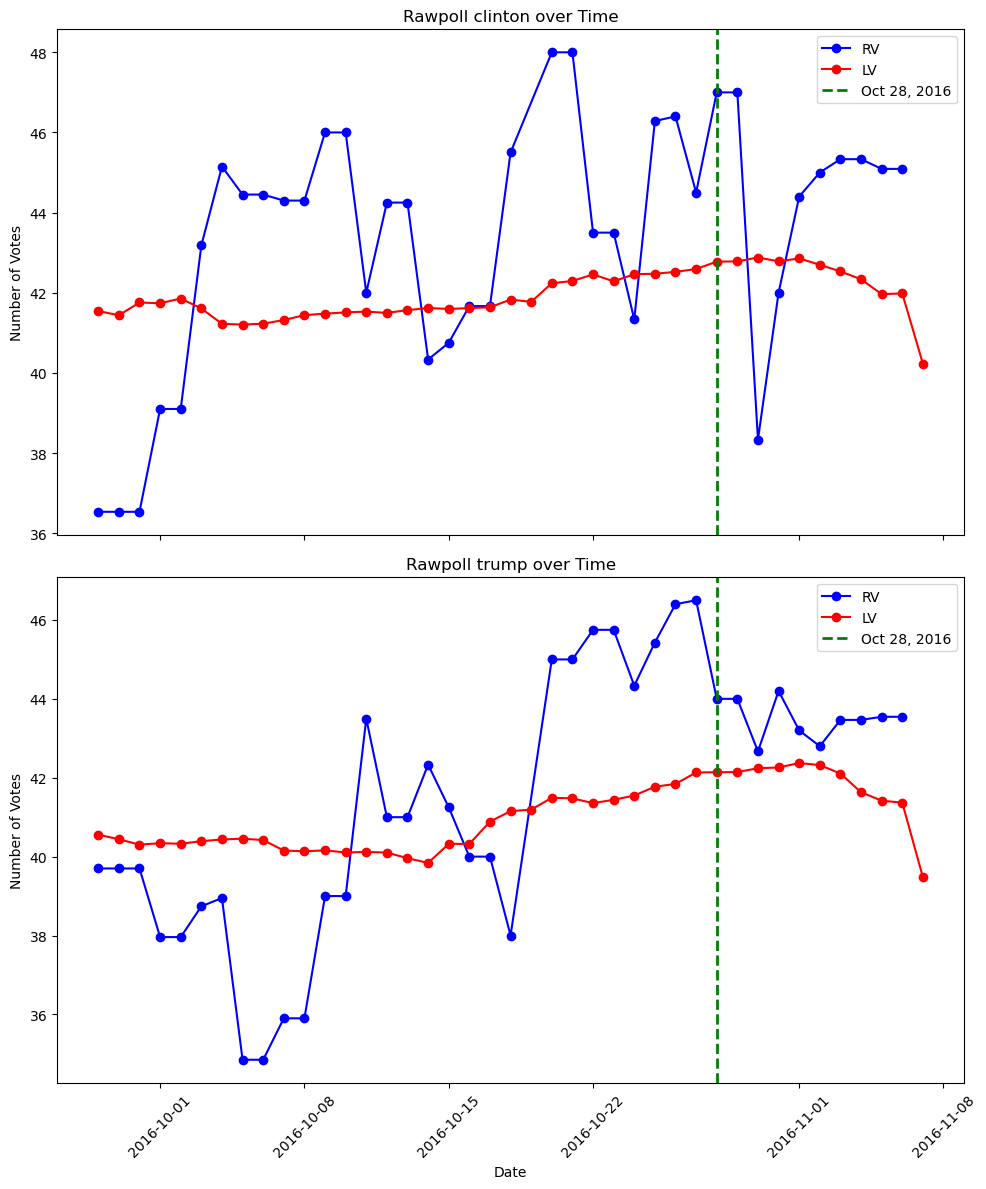

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the string date for the vertical line to a datetime object
oct_28_2016 = pd.to_datetime('2016-10-28')

# Poll columns for plotting
poll_columns = ['rawpoll_clinton', 'rawpoll_trump']

# Set up a figure with subplots for each poll column
fig, axes = plt.subplots(len(poll_columns), 1, figsize=(10, 12), sharex=True)

# Iterate through each column and create a plot
for i, column in enumerate(poll_columns):
    ax = axes[i]
    
    # Plot for 'rv' data
    ax.plot(df_rv['date'], df_rv[column], label='RV', color='blue', marker='o')
    
    # Plot for 'lv' data
    ax.plot(df_lv['date'], df_lv[column], label='LV', color='red', marker='o')
    
    # Set title and labels
    ax.set_title(f'{column.replace("_", " ").capitalize()} over Time')
    ax.set_ylabel('Number of Votes')
    
    # Add vertical line on October 28, 2016
    ax.axvline(x=oct_28_2016, color='green', linestyle='--', lw=2, label='Oct 28, 2016')
    
    # Enable the legend
    ax.legend()

# Set x-axis label for the last subplot
axes[-1].set_xlabel('Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
df_filtered.head()

,date,Population,samplesize,rawpoll_clinton,rawpoll_trump
802,2016-09-28,lv,29262.165676,41.542329,40.556347
803,2016-09-28,rv,461.714286,36.533333,39.700000
804,2016-09-29,lv,27291.821125,41.438721,40.440274
805,2016-09-29,rv,461.714286,36.533333,39.700000
806,2016-09-30,lv,25409.037791,41.756667,40.303102


In [29]:
import pandas as pd

# Separate RV and LV data for Clinton
df_rv_clinton = df_filtered[df_filtered['Population'] == 'rv'][['date', 'samplesize', 'rawpoll_clinton']]
df_lv_clinton = df_filtered[df_filtered['Population'] == 'lv'][['date', 'samplesize', 'rawpoll_clinton']]

# Rename columns for clarity
df_rv_clinton = df_rv_clinton.rename(columns={'rawpoll_clinton': 'rawpoll_clinton_RV', 'samplesize': 'samplesize_RV'})
df_lv_clinton = df_lv_clinton.rename(columns={'rawpoll_clinton': 'rawpoll_clinton_LV', 'samplesize': 'samplesize_LV'})

# Merge RV and LV data on 'date'
df_clinton = pd.merge(df_rv_clinton, df_lv_clinton, on='date', how='outer')

# Separate RV and LV data for Trump
df_rv_trump = df_filtered[df_filtered['Population'] == 'rv'][['date', 'samplesize', 'rawpoll_trump']]
df_lv_trump = df_filtered[df_filtered['Population'] == 'lv'][['date', 'samplesize', 'rawpoll_trump']]

# Rename columns for clarity
df_rv_trump = df_rv_trump.rename(columns={'rawpoll_trump': 'rawpoll_trump_RV', 'samplesize': 'samplesize_RV'})
df_lv_trump = df_lv_trump.rename(columns={'rawpoll_trump': 'rawpoll_trump_LV', 'samplesize': 'samplesize_LV'})

# Merge RV and LV data on 'date'
df_trump = pd.merge(df_rv_trump, df_lv_trump, on='date', how='outer')

# Save both dataframes to CSV
df_clinton.to_csv('data/df_clinton_separated.csv', index=False)
df_trump.to_csv('data/df_trump_separated.csv', index=False)

# Output the head of both dataframes for confirmation
print("Clinton Polls DataFrame:")
print(df_clinton.head())

print("\nTrump Polls DataFrame:")
print(df_trump.head())

Clinton Polls DataFrame:
        date  samplesize_RV  rawpoll_clinton_RV  samplesize_LV  \
0 2016-09-28     461.714286           36.533333   29262.165676   
1 2016-09-29     461.714286           36.533333   27291.821125   
2 2016-09-30     461.714286           36.533333   25409.037791   
3 2016-10-01     875.297619           39.100000   24314.549696   
4 2016-10-02     875.297619           39.100000   25582.568744   

   rawpoll_clinton_LV  
0           41.542329  
1           41.438721  
2           41.756667  
3           41.737183  
4           41.855799  

Trump Polls DataFrame:
        date  samplesize_RV  rawpoll_trump_RV  samplesize_LV  rawpoll_trump_LV
0 2016-09-28     461.714286             39.70   29262.165676         40.556347
1 2016-09-29     461.714286             39.70   27291.821125         40.440274
2 2016-09-30     461.714286             39.70   25409.037791         40.303102
3 2016-10-01     875.297619             37.96   24314.549696         40.341315
4 2016-10-02   